## EXPRESIONES REGULARES

# Librerías necesarias

In [12]:
import re

En esta sección vamos a explicar los aspectos fundamentales, junto con ejemplos representativos, del uso de expresiones regulares en Python. Para una referencia más completa recomendamos acceder al siguiente [enlace](https://docs.python.org/3/howto/regex.html). También recomendamos el uso de la siguiente página [web](https://regex101.com/) para la depuración de las expresiones regulares.

Las expresiones regulares, son una secuencia de caracteres que forma un patrón de búsqueda. Los patrones se interpretan como un conjunto de instrucciones que luego se ejecutan sobre un texto de entrada para producir una versión modifica del texto original. Las expresiones regulares pueden incluir patrones de coincidencia literal, de repetición, de composición, de ramificación, y otras sofisticadas reglas de reconocimiento de texto. Por lo tanto, estas cadenas se compondrán de **literales**, **metacaracteres**, **operadores** y **modificadores**.

## Patrones

Las expresiones regulares son un **potente lenguaje de descripción de texto**. Y no existe un lenguaje moderno que no permita usarlas. Las reglas con las que se forman son bastante simples. Pero aprender a combinarlas correctamente requiere de práctica. Utilizándolas podemos **buscar una subcadena al principio o al final del texto**. Incluso si queremos que se repita cierta cantidad de veces, si queremos que algo NO aparezca, o si debe aparecer una subcadena entre varias posibilidades. Permite, además, capturar aquellos trozos del texto que coincidan con la expresión para guardarlos en una variable o reemplazarlos por una cadena predeterminada; o incluso una cadena formada por los mismos trozos capturados. Estos son algunos aspectos básicos de las expresiones regulares:

## Literales

Un **literal** es cualquier carácter de la expresión regular que tiene una única interpretación, que coincidirá con el símbolo que representa. Por ejemplo, la expresión regular "`ola`", compuesta por los literales `o`, `l` y `a` capturará en un texto aquellos patrones que coincidan exactamente con esta secuencia de caracteres:

> La playa estaba muy s<u>ola</u>, y como había muchas <u>ola</u>s salí a surfear. Mientras nadaba me encontré con un amigo al que dije h<u>ola</u>.

## Metacaracteres

Un **metacarácter** es una secuencia en la expresión regular con un significado especial, que representa a un conjunto de caracteres que comparten una serie de características comunes.Los debemos escapar colocándoles una contrabarra () delante para buscarlos explícitamente

A continuación enumeramos los **metacaracteres** más relevantes:

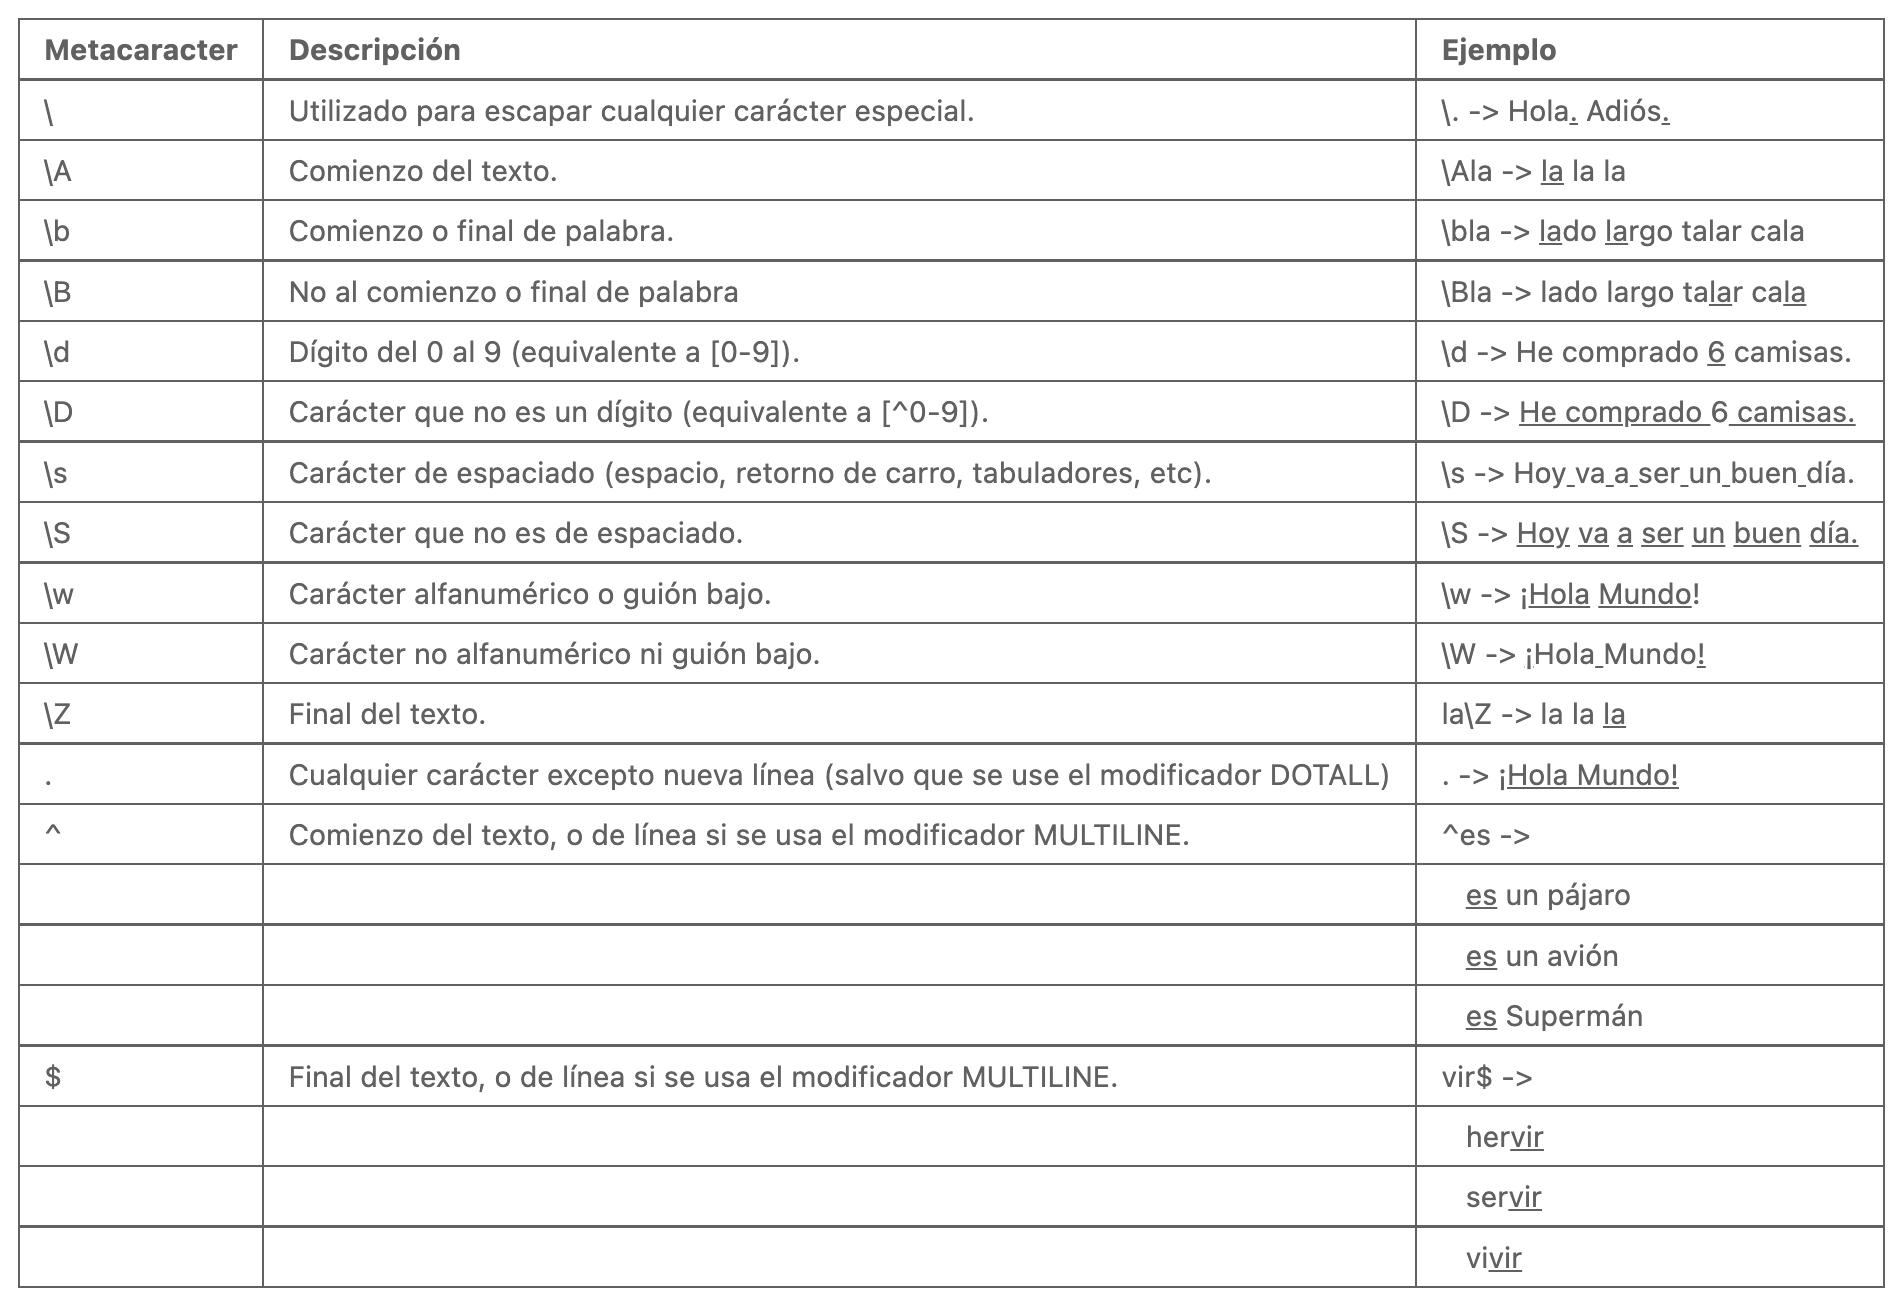

## Operadores

También disponemos de un conjunto de **operadores** que permiten combinar o modificar el sentido de los caracteres literales y metacaracteres:

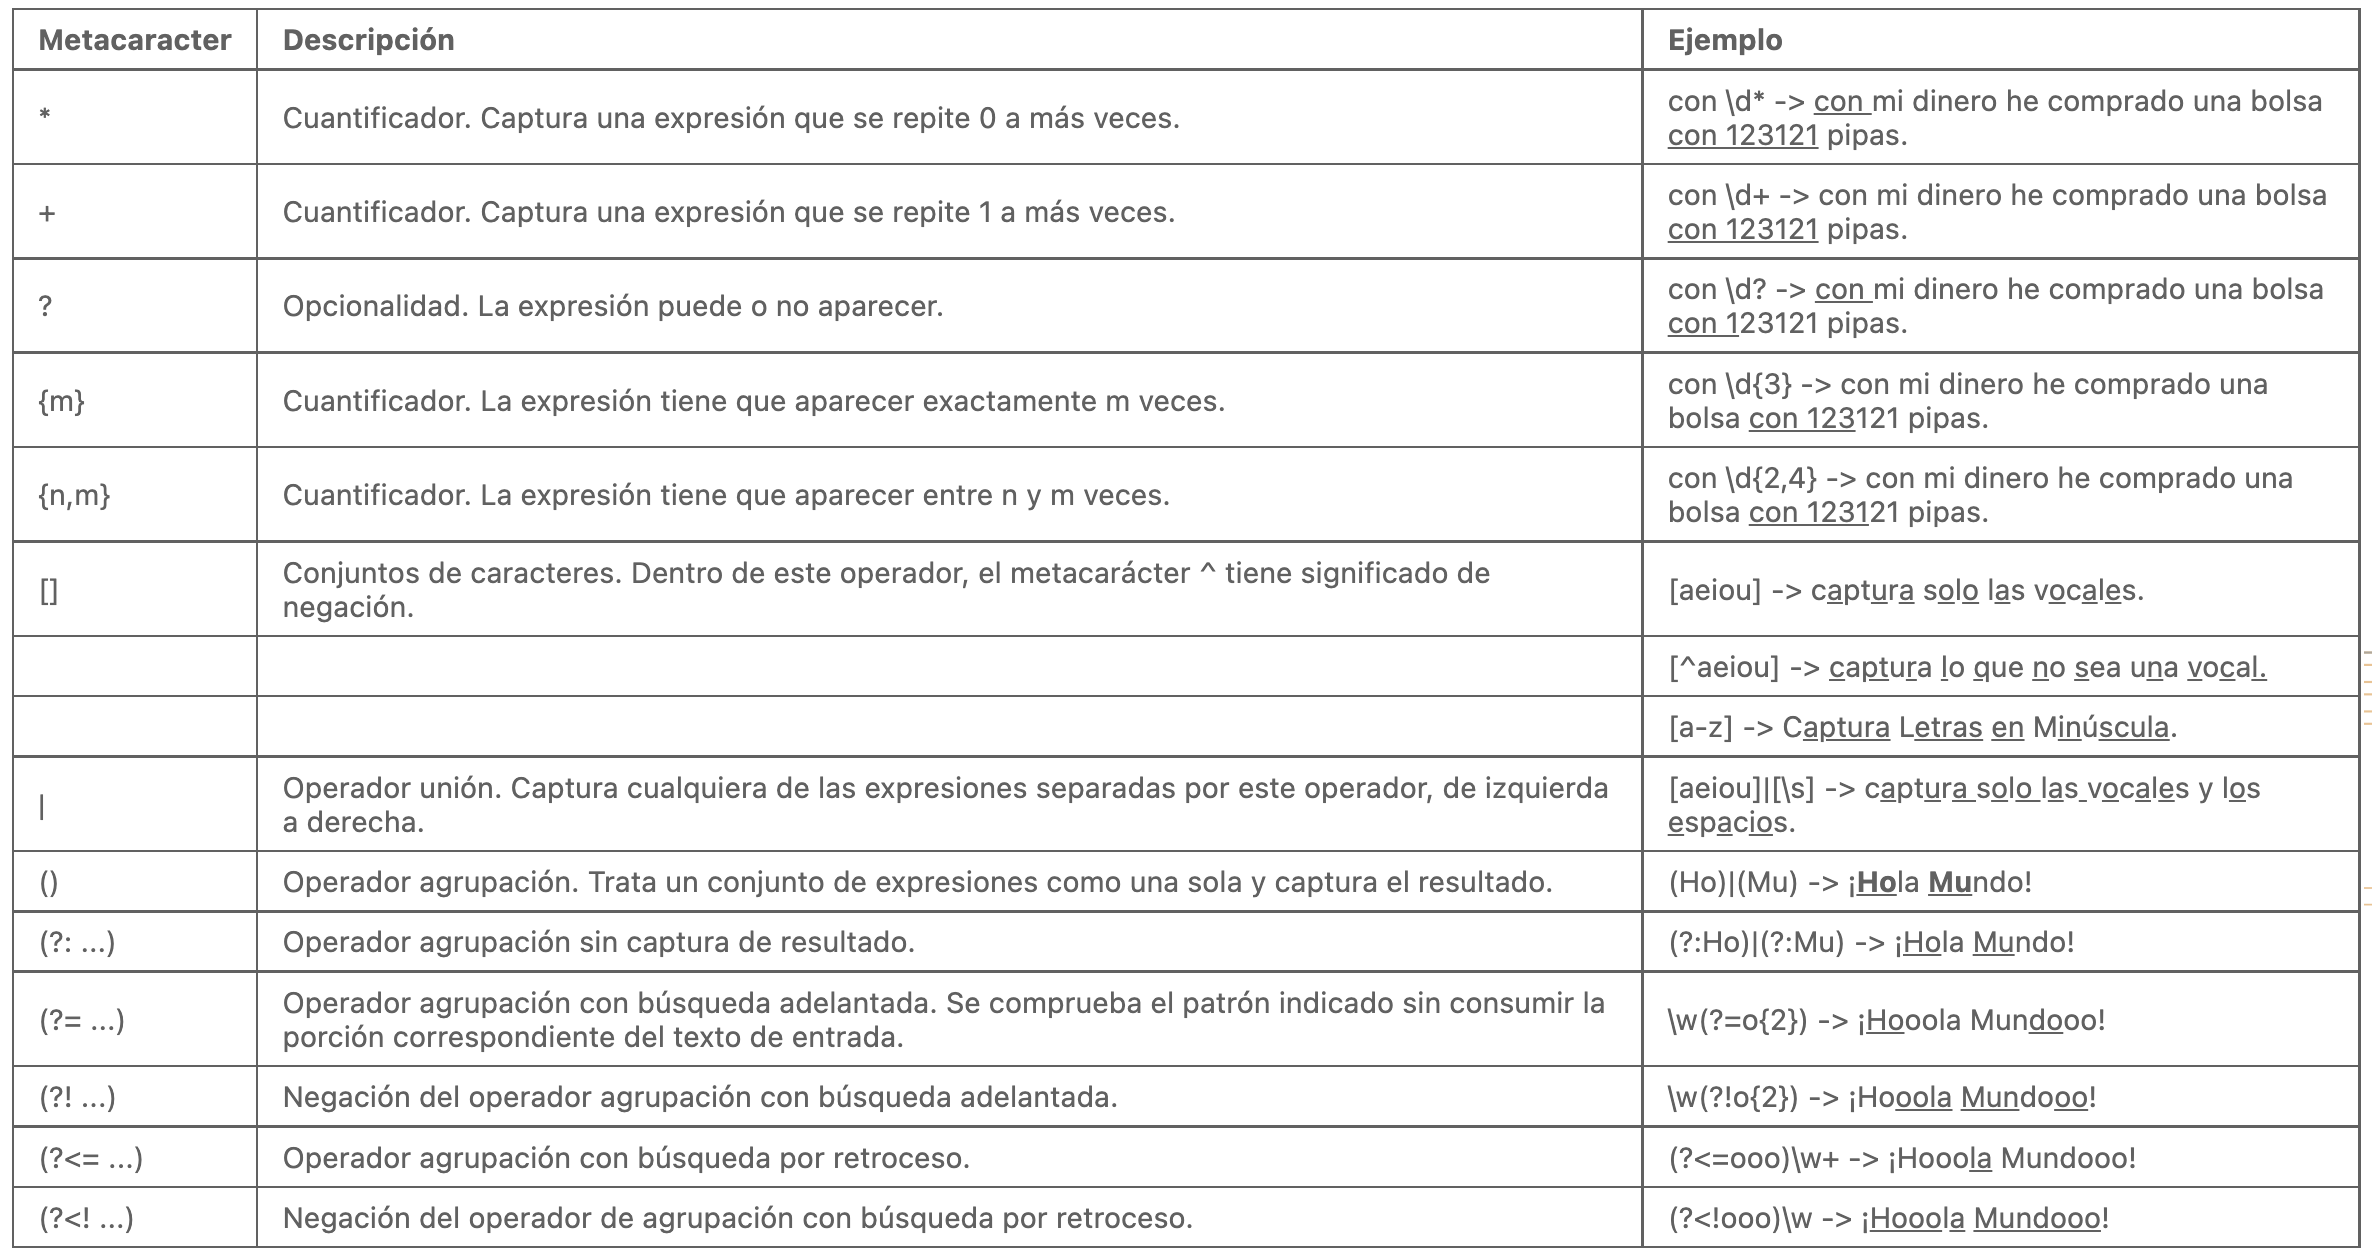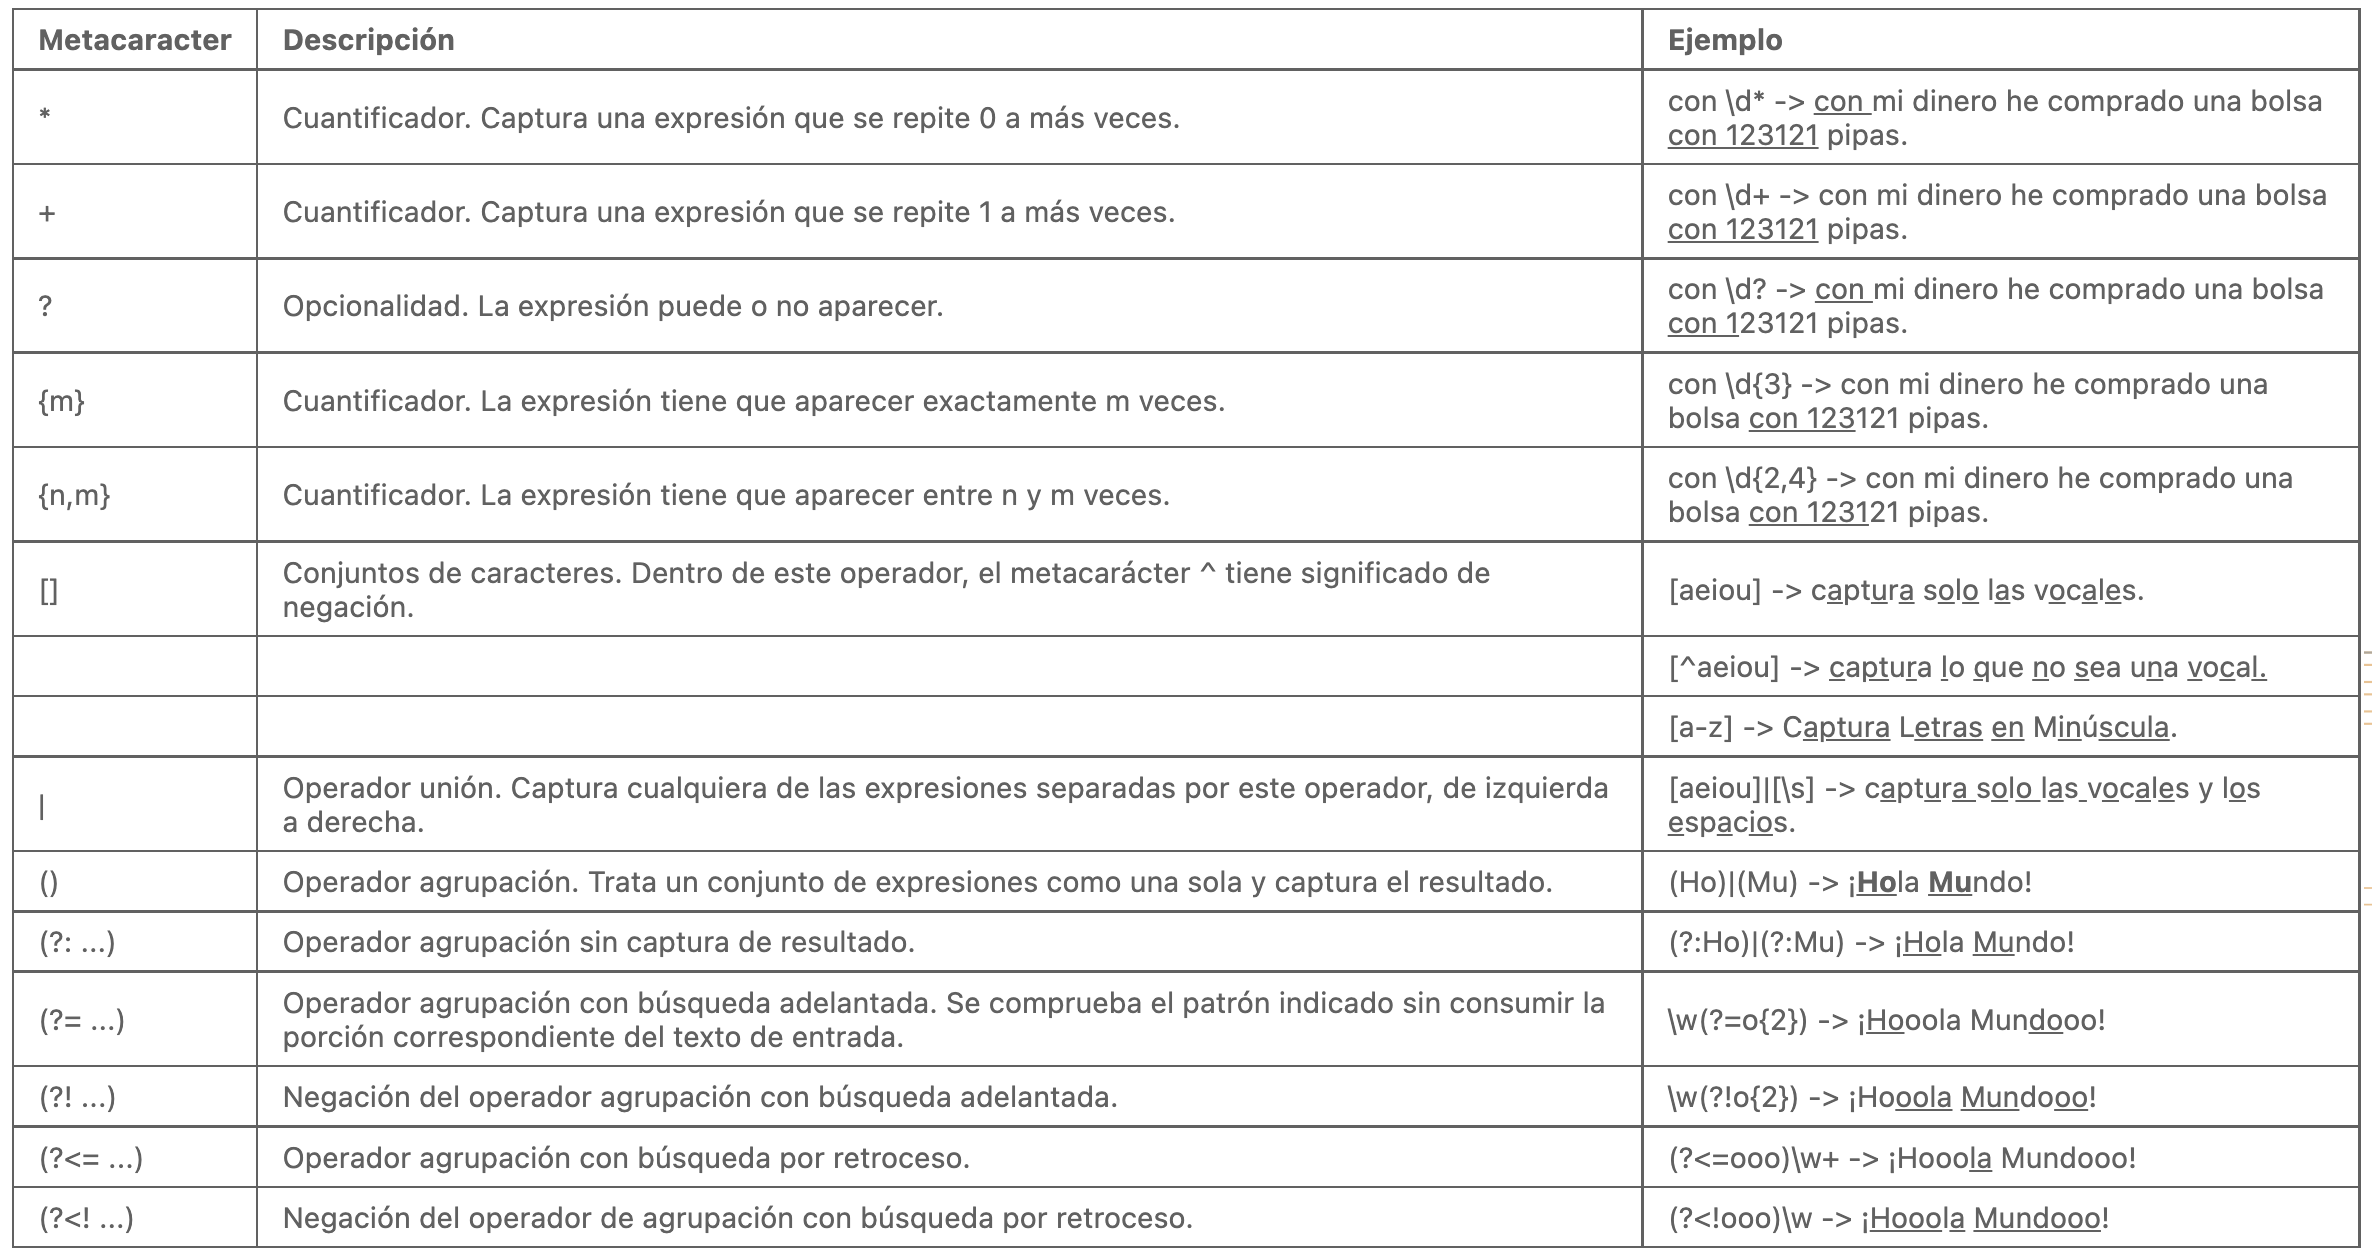

## Modificadores

En cuanto a los **modificadores**, se trata de literales que alteran de manera global la forma en que se procesa una expresión regular. Los más relevantes son los siguientes:

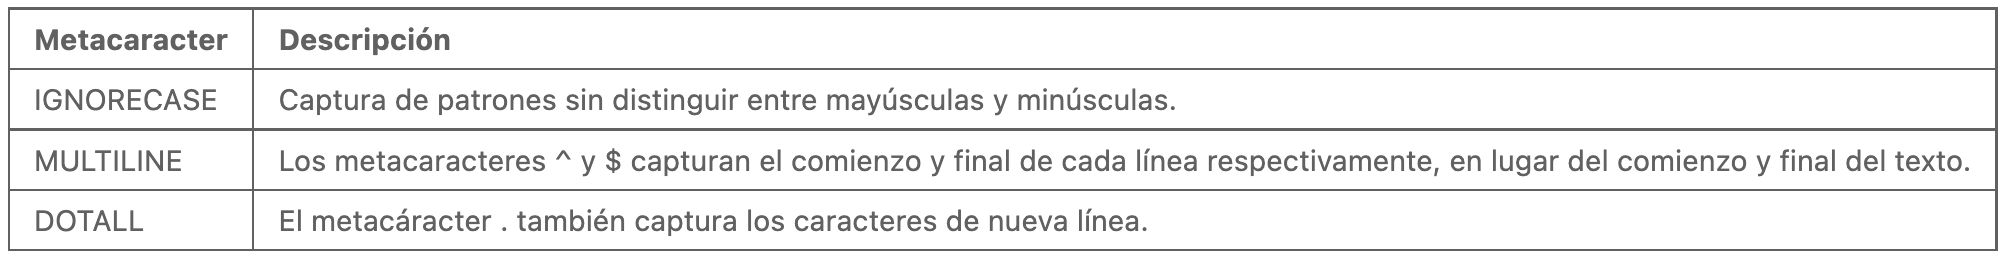

## Metodos

En Python disponemos de varios métodos para trabajar con expresiones regulares:

* El primero de ellos, `compile`, procesará una cadena de texto con **metacaracteres**, **literales** y **operadores** y preparará un objeto con la capacidad de detectar patrones. Además, este método acepta **modificadores** como parámetros. Mediante el siguiente código prepararemos un detectador de caracacteres alfabéticos sin distinguir entre mayúsculas y minúsculas:

In [4]:
p = re.compile(r"[a-z]+", re.IGNORECASE)

* El método `match` acepta una cadena de texto y le aplicará el patrón compilado para verificar si se ha detectado un patrón coincidente con la expresión regular <u>al comienzo de la cadena</u>. En el siguiente ejemplo, la palabra `Hola`, situada al comienzo de la cadena, verifica la expresión regular indicada, por lo que se devuelve este resultado:

In [5]:
p.match("Hola a todos")

<re.Match object; span=(0, 4), match='Hola'>

* El método `search` buscará <u>la primera coincidencia</u> en la cadena de texto suministrada como parámetro. En el siguiente ejemplo, la palabra `Saludos` es la primera que verifica la expresión regular indicada:

In [6]:
p.search("¡¡¡¡1.234.567 Saludos!!!!")

<re.Match object; span=(14, 21), match='Saludos'>

* El método `split` separará la cadena suministrada como parámetro en subcadenas separadas por porciones de texto que coincidan con la expresión regular indicada. En el siguiente ejemplo, las cadenas `libreta`, `cuadernos`, `gomas` y `estuches` coinciden con la expresión regular, por lo que se devolverán las subcadenas delimitadas por estas palabras:

In [7]:
p.split("1 libreta 2 cuadernos 3 gomas 4 estuches")

['1 ', ' 2 ', ' 3 ', ' 4 ', '']

* El método `findall` devolverá del texto pasado como parámetro el total de subcadenas que coinciden con la expresión regular indicada. En el siguiente ejemplo se mostrarán las palabras `libreta`, `cuadernos`, `gomas` y `estuches`, que son las que verifican la expresión introducida:

In [6]:
p.findall("1 libreta 2 cuadernos 3 gomas 4 estuches")

['libreta', 'cuadernos', 'gomas', 'estuches']

* A veces nos interesa tener un control más exhaustivo de aquellas porciones del texto pasado como parámetro que coinciden con la expresión regular indicada. Para ello, haremos uso del método `finditer`, mediante el que podremos <u>iterar</u> sobre las coincidencias encontradas. En el siguiente ejemplo pasamos a mayúsculas todas las conincidencias encontradas:

In [7]:
for match in p.finditer("1 libreta 2 cuadernos 3 gomas 4 estuches"):
  print(match.group().upper())

LIBRETA
CUADERNOS
GOMAS
ESTUCHES


* El método `sub` acepta dos parámetros: una cadena con la expresión a reemplazar y un texto sobre el que realizar el reemplazo. En la expresión de reemplazo, podemos hacer referencia a las coincidencias capturadas mediante `\{número}` donde `número` referencia a una porción de la expresión regular delimitada por el operador de agrupación `()`. En el siguiente ejemplo, haciendo uso de este método, invertimos el orden de las palabras y de las cifras:

In [8]:
p = re.compile(r"(\d+) ([a-z]+)", re.IGNORECASE)
p.sub(r"\2 \1", "1 libreta 2 cuadernos 3 gomas 4 estuches")

'libreta 1 cuadernos 2 gomas 3 estuches 4'

El primer argumento de este método puede ser una función, lo que nos proporciona una gran flexibilidad a la hora de realizar las sustituciones. Por ejemplo, el siguiente código elevará al cuadrado las cifras obtenidas y pasará a mayúsculas las palabras capturadas:

In [9]:
p.sub(lambda match: f"{int(match.group(1))**2} {match.group(2).upper()}", "1 libreta 2 cuadernos 3 gomas 4 estuches")

'1 LIBRETA 4 CUADERNOS 9 GOMAS 16 ESTUCHES'

Como habréis podido observar, mediante el método `group` podemos recuperar la porción de expresión regular contenida dentro del operador agrupación `()`.

A veces resulta muy cómodo darles nombres a estos grupos capturados, de manera que sea mucho más sencillo trabajar con ellos. Para ello, en la expresión regular haremos uso del operador `(?P<nombre> ...)` donde `nombre` será la denominación asignada a la agrupación. El siguiente ejemplo capturaría el nombre y la edad de una lista de personas:

In [10]:
p = re.compile(r"(?P<nombre>[A-Z][a-záéíóú]+)[^\d]*((?P<edad>\d+) años)")
for match in p.finditer("Pablo tiene 35 años, Pedro tiene 45 años, Susana tiene 21 años y María 53 años."):
  print(f"Nombre: {match.group('nombre')}, edad: {match.group('edad')}")

Nombre: Pablo, edad: 35
Nombre: Pedro, edad: 45
Nombre: Susana, edad: 21
Nombre: María, edad: 53
